In [47]:
# K-means algorithm:
# 1. Choose the number of clusters
# 2. Select at random K-points, which will be the centroids (not necessarily from your dataset)
# 3. Assign each datapoint to the 'closest' centroid.
# 4. Compute & place the new centroid of each cluster
# 5. Reassign each data point to the new closest centroid. If any reassignment took place --> step 4.

# Note: Random Initialization Trap 
# Result is dependent on the selection of the first points (local minimum)
# Need a measure to define what is a "good" end result --> need a measure of "tightness" of cluster(?)
# solution: K-means++ algorithm on how to select the "random centroids" at the start.

# Note: How to select the number of clusters
# Need to quantify how good k clusters perform --> WCSS (=inner shell): sum of all distances from points to the centre of a cluster
# The WCSS will go to 0 if you'd increase the number clusters.
# The 'elbow method' to find a good amount of clusters. (arbitrary)

#libraries
%matplotlib notebook   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# - Set path - 
#convert to raw string and add an extra \ to the end (not to escape the string)
dir = (r'C:\Users\msfernandez\Machine Learning A-Z\Machine Learning A-Z Template Folder\Part 4 - Clustering\Section 24 - K-Means Clustering\\')
os.chdir(dir)

# - - - - - - - - - - - -
# - import the dataset - 
# - - - - - - - - - - - -
dataset = pd.read_csv('Mall_Customers.csv')
display(dataset.head())

X = dataset.iloc[:, [3,4]].values

from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

'''
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('N clusters')
plt.ylabel('WCSS')
plt.show()
'''



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


"\nplt.plot(range(1,11), wcss)\nplt.title('Elbow Method')\nplt.xlabel('N clusters')\nplt.ylabel('WCSS')\nplt.show()\n"

<IPython.core.display.Javascript object>


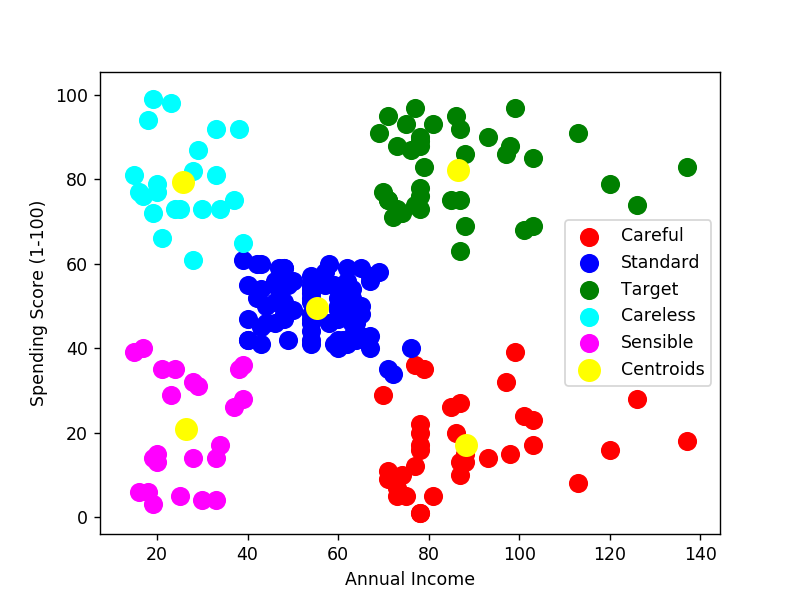

In [68]:

# 5 seems a good amount
kmeans = KMeans( n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)


fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualisation
ax1.scatter(X[y_kmeans == 0, 0], X[y_kmeans ==0, 1], s=100, c = 'red', label = 'Careful')
ax1.scatter(X[y_kmeans == 1, 0], X[y_kmeans ==1, 1], s=100, c = 'blue', label = 'Standard')
ax1.scatter(X[y_kmeans == 2, 0], X[y_kmeans ==2, 1], s=100, c = 'green', label = 'Target')
ax1.scatter(X[y_kmeans == 3, 0], X[y_kmeans ==3, 1], s=100, c = 'cyan', label = 'Careless')
ax1.scatter(X[y_kmeans == 4, 0], X[y_kmeans ==4, 1], s=100, c = 'magenta', label = 'Sensible')
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c='yellow', label = 'Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
fig.show()